---
# YAML data for Mercury App
title: Prediction using RNN-LSTM
description: Stock Market Prediction using RNN-LSTM method 
show-code: True
author: Rajapriya R
show-prompt: True
---

In [2]:
# Done by Rajapriya R (2019506071)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [3]:
data=pd.read_csv('./data/data.csv',index_col='date',parse_dates=True)
data.head(5)

,Unnamed: 0,open,high,low,close,adjusted close,volume,dividend amount,split cf
date,,,,,,,,,
2021-11-26,0,115.00,116.335,114.56,115.81,115.81,3322012,0.0,1.0
2021-11-24,1,116.16,117.270,116.08,116.73,116.73,3220802,0.0,1.0
2021-11-23,2,116.79,117.940,116.04,116.79,116.79,4914995,0.0,1.0
2021-11-22,3,116.00,118.810,115.19,116.47,116.47,6417218,0.0,1.0
2021-11-19,4,116.49,116.560,115.27,116.05,116.05,5384548,0.0,1.0


In [4]:
data.tail(5)

,Unnamed: 0,open,high,low,close,adjusted close,volume,dividend amount,split cf
date,,,,,,,,,
1999-11-05,5550,92.75,92.94,90.19,90.25,52.226608,13737600,0.0,1.0
1999-11-04,5551,94.44,94.44,90.00,91.56,52.984689,16697600,0.0,1.0
1999-11-03,5552,95.87,95.94,93.50,94.37,54.610803,10369100,0.0,1.0
1999-11-02,5553,96.75,96.81,93.69,94.81,54.865426,11105400,0.0,1.0
1999-11-01,5554,98.50,98.81,96.37,96.75,55.988081,9551800,0.0,1.0


In [5]:
data.isna().any()

Unnamed: 0         False
open               False
high               False
low                False
close              False
adjusted close     False
volume             False
dividend amount    False
split cf           False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5555 entries, 2021-11-26 to 1999-11-01
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5555 non-null   int64  
 1   open             5555 non-null   float64
 2   high             5555 non-null   float64
 3   low              5555 non-null   float64
 4   close            5555 non-null   float64
 5   adjusted close   5555 non-null   float64
 6   volume           5555 non-null   int64  
 7   dividend amount  5555 non-null   float64
 8   split cf         5555 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 434.0 KB


In [7]:
data.describe

<bound method NDFrame.describe of             Unnamed: 0    open     high     low   close  adjusted close  \
date                                                                      
2021-11-26           0  115.00  116.335  114.56  115.81      115.810000   
2021-11-24           1  116.16  117.270  116.08  116.73      116.730000   
2021-11-23           2  116.79  117.940  116.04  116.79      116.790000   
2021-11-22           3  116.00  118.810  115.19  116.47      116.470000   
2021-11-19           4  116.49  116.560  115.27  116.05      116.050000   
...                ...     ...      ...     ...     ...             ...   
1999-11-05        5550   92.75   92.940   90.19   90.25       52.226608   
1999-11-04        5551   94.44   94.440   90.00   91.56       52.984689   
1999-11-03        5552   95.87   95.940   93.50   94.37       54.610803   
1999-11-02        5553   96.75   96.810   93.69   94.81       54.865426   
1999-11-01        5554   98.50   98.810   96.37   96.75       55.9

In [8]:
data.nunique()

Unnamed: 0         5555
open               4083
high               4267
low                4306
close              4351
adjusted close     5389
volume             5460
dividend amount      24
split cf              2
dtype: int64

<Axes: xlabel='date'>

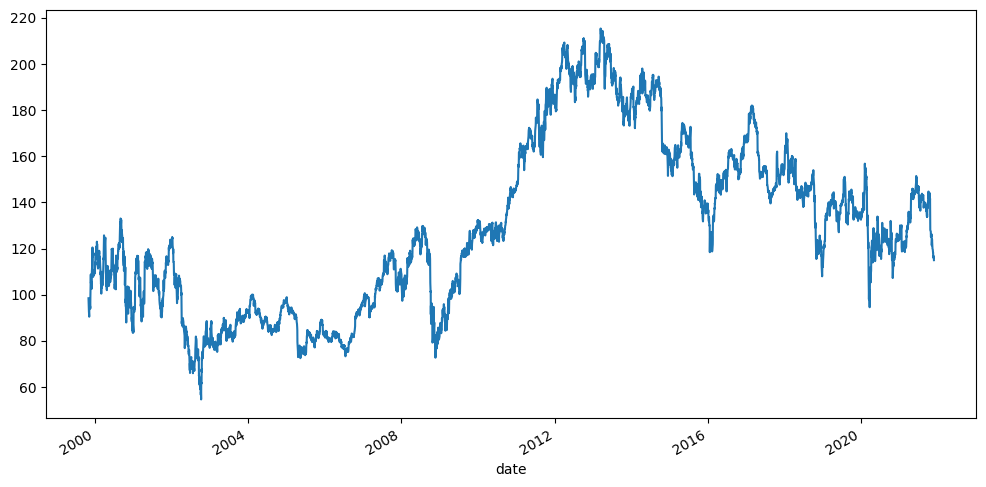

In [9]:
data['open'].plot(figsize=(12,6))

In [10]:
data.dtypes


Unnamed: 0           int64
open               float64
high               float64
low                float64
close              float64
adjusted close     float64
volume               int64
dividend amount    float64
split cf           float64
dtype: object

In [11]:
data.rolling(7).mean().head(25)

,Unnamed: 0,open,high,low,close,adjusted close,volume,dividend amount,split cf
date,,,,,,,,,
2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-17,3.0,116.740000,117.800714,115.890000,116.652857,116.652857,4.621535e+06,0.000000,1.000000
2021-11-16,4.0,117.300000,118.310000,116.441429,117.031429,117.031429,4.825642e+06,0.000000,1.000000
2021-11-15,5.0,117.782857,118.722857,116.760000,117.337143,117.337143,5.086430e+06,0.000000,1.000000


<Axes: xlabel='date'>

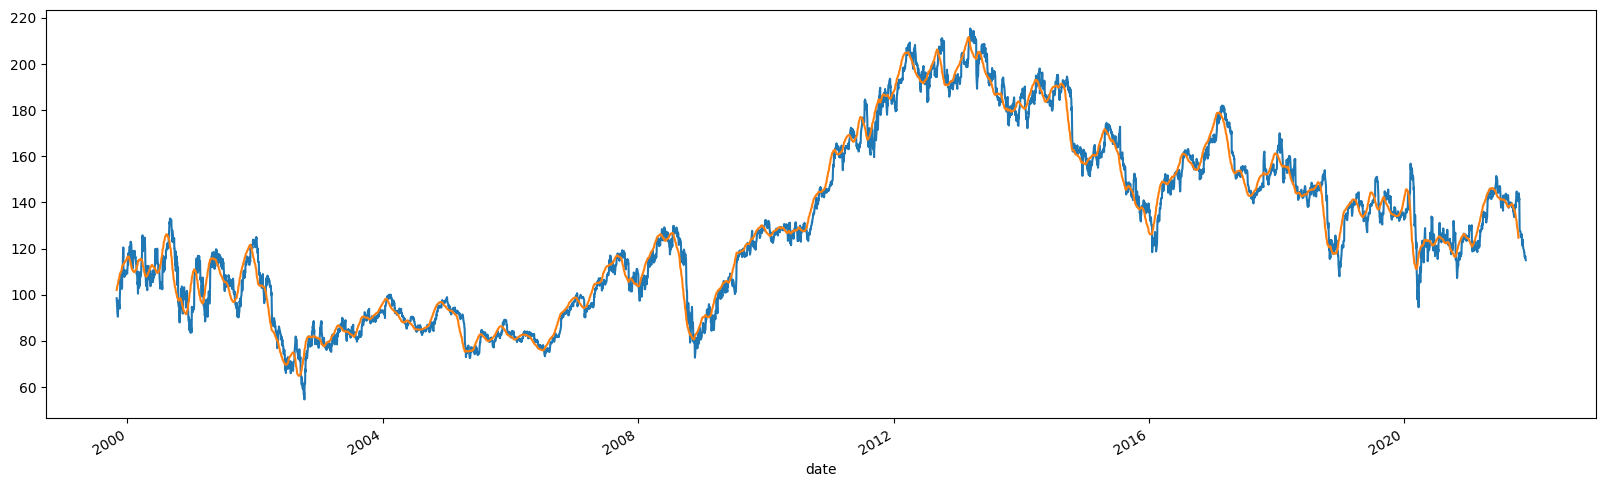

In [12]:
data['open'].plot(figsize=(20,6))
data.rolling(window=30).mean()['close'].plot()

<Axes: xlabel='date'>

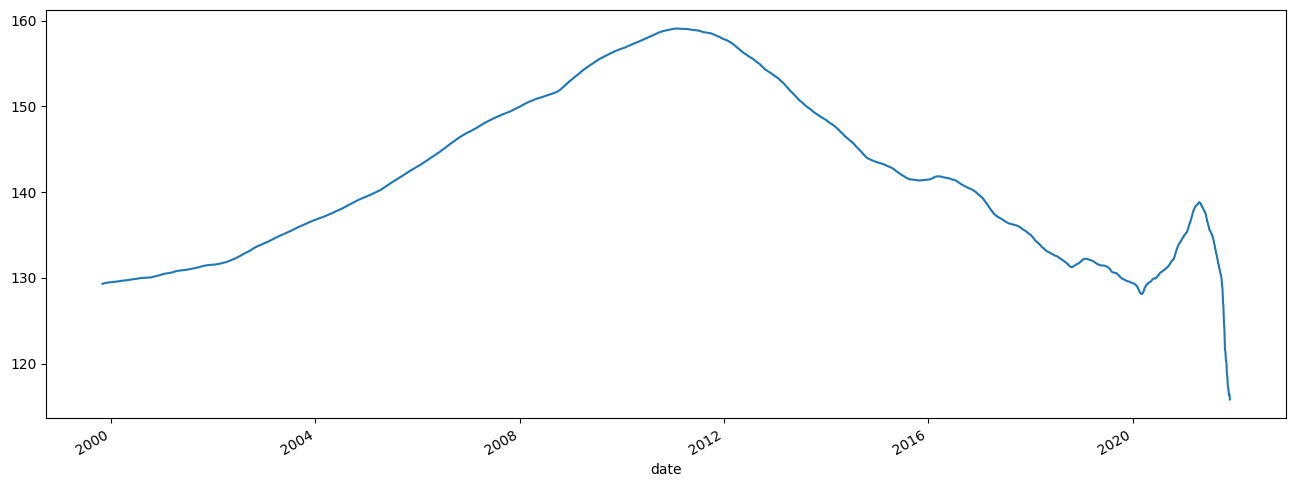

In [13]:
data['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [14]:
training_set=data['open']
training_set=pd.DataFrame(training_set)

In [15]:
data.isna().any()

Unnamed: 0         False
open               False
high               False
low                False
close              False
adjusted close     False
volume             False
dividend amount    False
split cf           False
dtype: bool

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [17]:
train_set = data.iloc[:1482, 1:2].values
test_set = data.iloc[1482:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
X_train[0][0]

array([0.23340961])

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras import layers



In [19]:
regressor=Sequential()

In [20]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(64,input_shape=(64,32,16),return_sequences=False))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(1,activation='linear'))
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
regressor.fit(X_train,y_train, epochs=20,batch_size=32)

Epoch 1/20

45/45 [==============================] - 8s 45ms/step - loss: 0.0355
Epoch 2/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0120
Epoch 3/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0099
Epoch 4/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0093
Epoch 5/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0090
Epoch 6/20
45/45 [==============================] - 2s 48ms/step - loss: 0.0083
Epoch 7/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0084
Epoch 8/20
45/45 [==============================] - 2s 44ms/step - loss: 0.0069
Epoch 9/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0064
Epoch 10/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0057
Epoch 11/20
45/45 [==============================] - 2s 46ms/step - loss: 0.0063
Epoch 12/20
45/45 [==============================] - 2s 44ms/step - loss: 0.0053
Epoch 13/20
45/45 [=================

In [23]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [24]:
dt_train = data.iloc[:1482, 1:2]
dt_test = data.iloc[1482:, 1:2]
dataset_total = pd.concat((dt_train, dt_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dt_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 4000):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [25]:
X_test.shape

(3940, 60, 1)

In [26]:
predict_train = regressor.predict(X_train)
predicted_stock_price = regressor.predict(X_test)
predict_train = sc.inverse_transform(predict_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

124/124 [==============================] - 2s 15ms/step


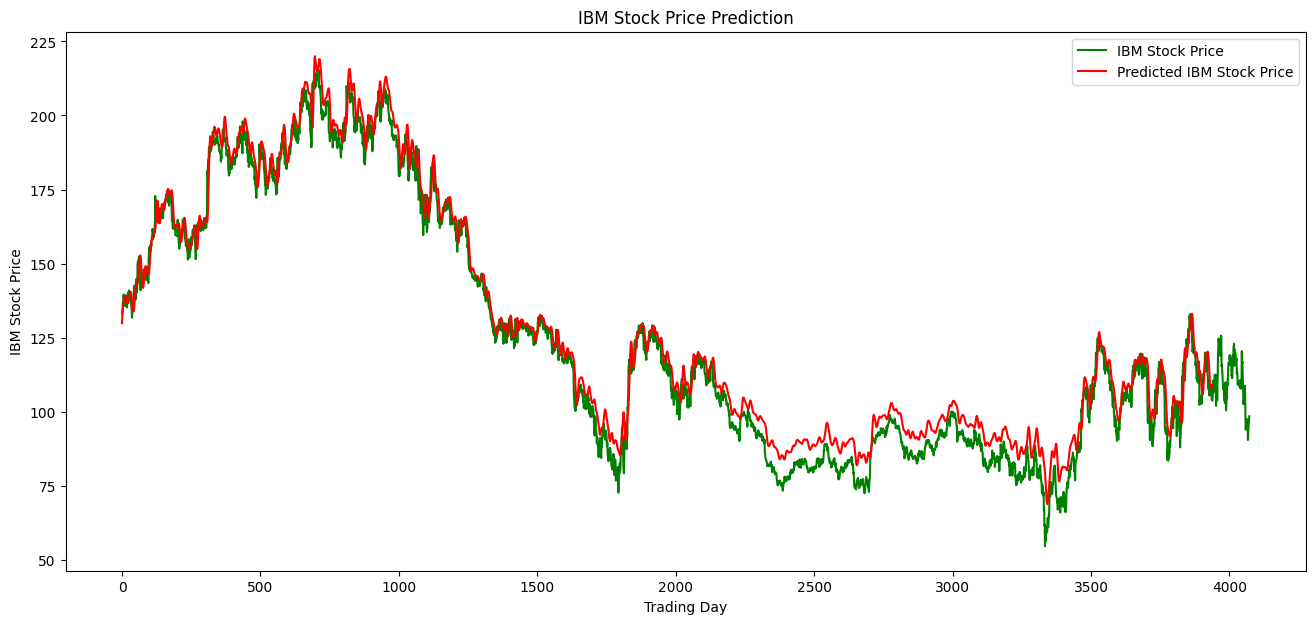

In [27]:
plt.figure(figsize=(16,7))
plt.plot(dt_test.values, color = 'green', label = 'IBM Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [29]:
import dill 

dill.dump_session('RNN-LSTM.db')